95% confidence interval for the average restaurant score, computed by bootstrapping:
( 89.87 , 92.6 )
95% confidence interval for the average restaurant score is 
(89.88228595129469,92.63771404870532)


12.484735400972708

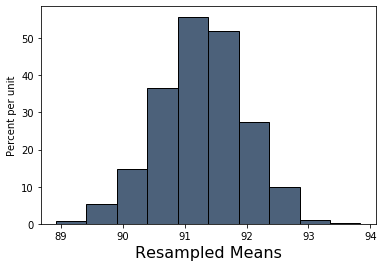

In [5]:
# 1.1

import datascience as ds
from datascience import Table
import numpy as np
restaurants=Table.read_table('C:\\Users\\pusul\\Downloads\\restaurant_inspection_scores.csv').drop('Address','Facility ID')#To read File
restaurant_sample=restaurents.sample(100, with_replacement=False)#It would take samples of 100
def one_resampled_mean(data): #Function Defintion
    resampled_data=data.select('Score').sample().column(0)
    return np.mean(resampled_data) #Finding Average of sampled data
this_mean=one_resampled_mean(restaurant_sample)#Function call
this_mean





# 1.2

import datascience as ds
from datascience import Table
import numpy as np
import time
restaurants=Table.read_table('C:\\Users\\pusul\\Downloads\\restaurant_inspection_scores.csv').drop('Address','Facility ID')#Read CSV file
restaurant_sample=restaurents.sample(100, with_replacement=False)#Take samples of 100
def bootstrap_scores(): #Function Defintion
    resampled_means = ds.util.make_array()#Create a Array
    for i in range(5000): #To get 5000 sampled means
        resampled_mean = one_resampled_mean(restaurant_sample)#Function Call
        resampled_means = np.append(resampled_means, resampled_mean)#Store all sampled means in this variable
    return resampled_means
resampled_means = bootstrap_scores() #Function Call
resampled_means





# 1.3

import datascience as ds
from datascience import Table
import numpy as np
restaurants=Table.read_table('C:\\Users\\pusul\\Downloads\\restaurant_inspection_scores.csv').drop('Address','Facility ID')#To read CSV file
restaurant_sample=restaurents.sample(100, with_replacement=False)#Take samples of 100
def bootstrap_scores():#Function Defintion
    resampled_means = ds.util.make_array()#Create an Array
    for i in range(5000):##To get 5000 sampled means
        resampled_mean = one_resampled_mean(restaurant_sample)#Function Call
        resampled_means = np.append(resampled_means, resampled_mean)#Store all sampled means in this variabl
    return resampled_means
resampled_means = bootstrap_scores()#Function call
resampled_means
lower_bound = np.percentile(resampled_means,2.5)#Take 2.5 percentile of normal Distribution
upper_bound = np.percentile(resampled_means,97.5)#Take 97.5 percentile of normal Distribution
print("95% confidence interval for the average restaurant score, computed by bootstrapping:\n(",lower_bound,',',upper_bound,")")





#1.4


get_ipython().run_line_magic('matplotlib', 'inline')
Table().with_column('Resampled Means', resampled_means).hist()



# 1.6

sample_mean = np.mean(restaurant_sample.column(3))
Standard_deviation_sample = np.std(restaurant_sample.column(3))
sample_row_size = restaurant_sample.num_rows
means_standard_deviation = Standard_deviation_sample/np.sqrt(sample_row_size)
lower_bound_distribution = sample_mean-(2*means_standard_deviation)
upper_bound_distribution = sample_mean+(2*means_standard_deviation)
print(f"95% confidence interval for the average restaurant score is \n({lower_bound_distribution},{upper_bound_distribution})")




# 2.1

coin_proportions = ds.util.make_array(.5, .5) #Fair Coin
def one_statistic_prop_heads(n):#Function Defintion
    simulated_proportions = ds.util.sample_proportions(n, coin_proportions)#Coin Proportion
    prop_heads = simulated_proportions.item(0)#Proportion of Heads
    return prop_heads
one_statistic_prop_heads(10)#Function call





# 2.2
import datascience as ds
import numpy as np
def sample_size_n(n):#Function Defintion
    coin_proportions = ds.util.make_array(.5, .5) # Fair Coin
    heads_proportions = ds.util.make_array()#create an Array
    for i in np.arange(5000):#It will simulate for 5000 times
        prop_heads = one_statistic_prop_heads(n)
        heads_proportions = np.append(heads_proportions, prop_heads)#Sample of heads
    return heads_proportions
sample_size_n(10)#Function call





#2.3

import datascience as ds
from datascience import Table
import numpy as np
flight_delay=Table.read_table("C:\\Users\\pusul\\Downloads\\united_summer2015.csv")#Read CSV file
def emperical_sample_mean_sd(n):#Function Defintion
    sample_means=ds.util.make_array()#It will create an array
    for i in np.arange(500):#Simulation for 500 times
        sample=flight_delay.sample(10, with_replacement=True)#Sample Size of 10
        sample_mean=np.mean(sample.column('Delay'))#Average Calculation of Sample
        sample_means=np.append(sample_means,sample_mean)#It will append all samples means in this variable
    return np.std(sample_means) #Calculate Standard Deviation and returns to function call
emperical_sample_mean_sd(10)#Function Call





# 2.4

def predict_sample_mean_sd(n):
    return np.std(flight_delay.column('Delay'))/n**0.5 #Calculate Sd of original Population
predict_sample_mean_sd(10)
